# Week 2 Jupyter Notebook - Linear Regression Part 2

## Lasso, Ridge, and Elastic Net Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# Load Dataset and Inspect

In [ ]:
# Load the  dataset
df = pd.read_csv('dataset_phishin.csv')

# Inspect the dataset
df_info = df.info()
df_head = df.head()
df_description = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

## Feature Selection, Target Encoding, and Data Preprocessing

In [23]:
features = ['length_url', 'nb_dots', 'nb_slash', 'domain_age', 'web_traffic']
X = df[features]
y = df['status'].apply(lambda x: 1 if x == 'phishing' else 0)  # Encode target

# Step 5: Train/test split and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Model Training (Lasso, Ridge and Elastic Net Regression), Evaluation, and Coefficient Comparison

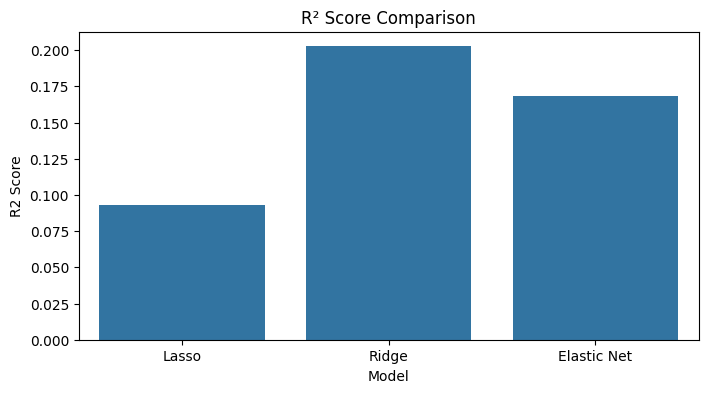

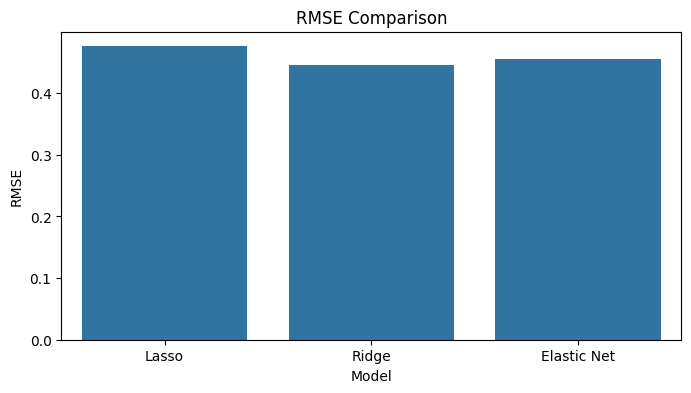

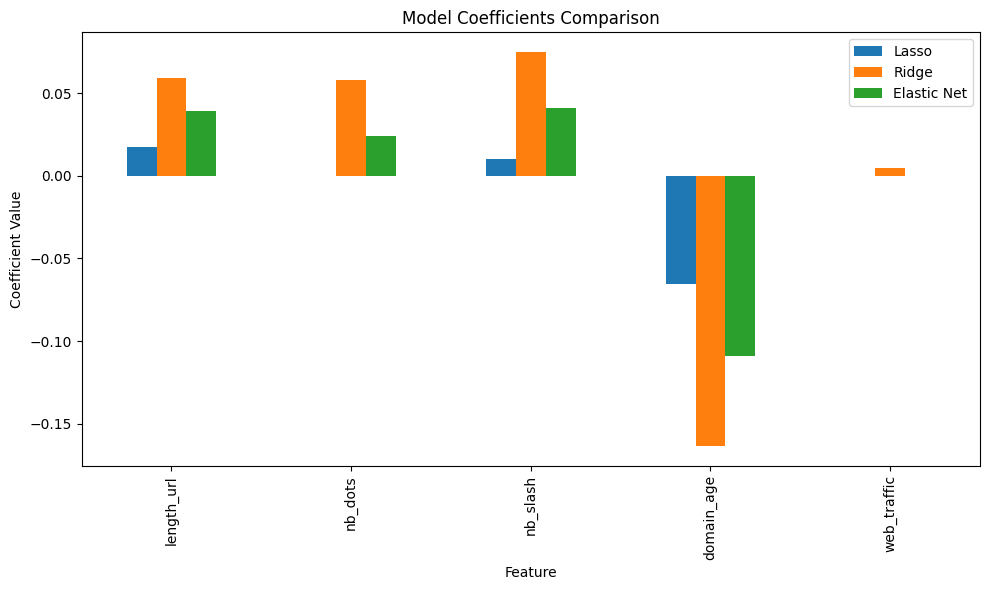

(         Model  R2 Score      RMSE
 0        Lasso  0.093278  0.476085
 1        Ridge  0.202594  0.446465
 2  Elastic Net  0.168385  0.455941,
        Feature     Lasso     Ridge  Elastic Net
 0   length_url  0.017164  0.059468     0.039355
 1      nb_dots  0.000000  0.057749     0.024101
 2     nb_slash  0.010068  0.074902     0.041069
 3   domain_age -0.065208 -0.163438    -0.109167
 4  web_traffic  0.000000  0.005005     0.000000)

In [28]:
# Train and evaluate Lasso, Ridge, and Elastic Net regression models

# Initialize models
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train models
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

# Predict
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_elastic = elastic_net.predict(X_test_scaled)

# Evaluate
results = {
    'Model': ['Lasso', 'Ridge', 'Elastic Net'],
    'R2 Score': [
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_elastic)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_elastic))
    ]
}

results_df = pd.DataFrame(results)

# Coefficients for visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_,
    'Elastic Net': elastic_net.coef_
})

import matplotlib.pyplot as plt

# Plot model evaluation metrics
plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="R2 Score", data=results_df)
plt.title("R² Score Comparison")
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.title("RMSE Comparison")
plt.show()

# Plot coefficients
coef_df.set_index('Feature').plot(kind='bar', figsize=(10, 6))
plt.title("Model Coefficients Comparison")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

results_df, coef_df


In Week 2 of the Capstone Project, I applied three regularized linear regression techniques Lasso, Ridge, and Elastic Net to the phishing dataset. After selecting five key features (length_url, nb_dots, nb_slash, domain_age, and web_traffic) and encoding the target variable, I split the data into training and testing sets and standardized the features. Each regression model was trained individually, and I evaluated their performance using R² Score and RMSE. The Ridge Regression model performed the best overall, achieving an R² of 0.2026 and an RMSE of 0.4465. Lasso yielded the lowest performance with an R² of 0.0933 and RMSE of 0.4761, while Elastic Net offered a middle ground at R² = 0.1684 and RMSE = 0.4559. Visualizations including coefficient comparisons and bar plots for R² and RMSE provided additional insight into model behavior and feature influence. These results underscore the value of regularization in mitigating overfitting and improving generalization, especially in datasets with potential multicollinearity or irrelevant features.

# Visualization 

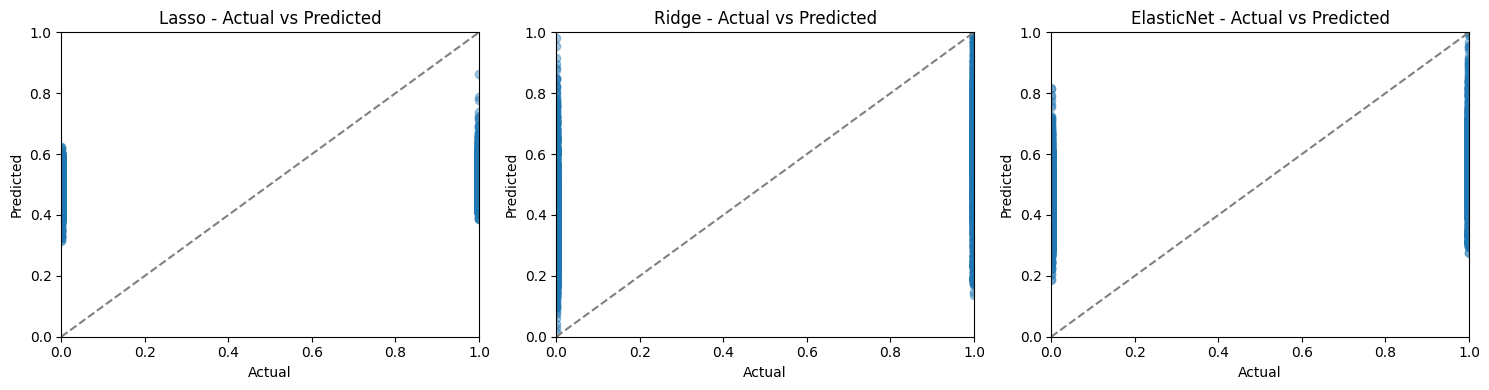

In [26]:
models = {
    "Lasso": y_pred_lasso,
    "Ridge": y_pred_ridge,
    "ElasticNet": y_pred_elastic
}

plt.figure(figsize=(15, 4))

for i, (name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.plot([0, 1], [0, 1], '--', color='gray')  # reference line
    plt.title(f"{name} - Actual vs Predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.xlim(0, 1)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()


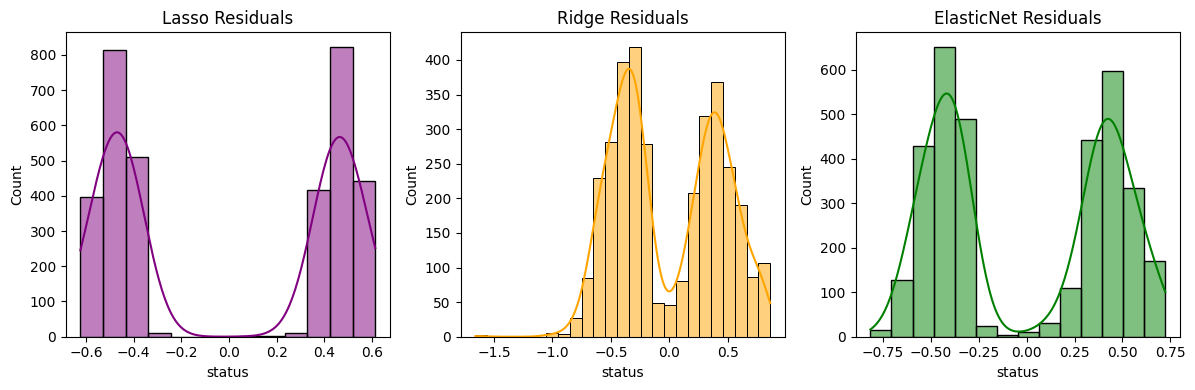

In [27]:
residuals_lasso = y_test - y_pred_lasso
residuals_ridge = y_test - y_pred_ridge
residuals_elastic = y_test - y_pred_elastic

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(residuals_lasso, kde=True, color="purple")
plt.title("Lasso Residuals")

plt.subplot(1, 3, 2)
sns.histplot(residuals_ridge, kde=True, color="orange")
plt.title("Ridge Residuals")

plt.subplot(1, 3, 3)
sns.histplot(residuals_elastic, kde=True, color="green")
plt.title("ElasticNet Residuals")

plt.tight_layout()
plt.show()


To evaluate how well the Lasso, Ridge, and Elastic Net models predicted the phishing status, I generated scatter plots comparing the actual values (y_test) against the predicted values from each model. In an ideal scenario, the points would align along the diagonal reference line (where predicted = actual), indicating perfect predictions. In our plots, Ridge Regression showed the tightest clustering around the diagonal, aligning with its stronger R² and lower RMSE. The Lasso model's predictions were more scattered, revealing its limited ability to capture the full variance of the target variable. Elastic Net performed moderately, with a spread wider than Ridge but better than Lasso. I also plotted the residuals (the difference between actual and predicted values) for all three models to analyze prediction errors. A well-performing regression model should have residuals that are symmetrically distributed around zero, without extreme skewness. The Ridge model produced the most centered and compact residual distribution, indicating stable predictions. Lasso and Elastic Net showed broader spreads, with Lasso exhibiting more error variance. These residual plots support the evaluation metrics, reinforcing that Ridge Regression is the most robust model among the three for this dataset.